In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from gdc.tempo.data_access import *
from gdc.utils import GDC_DATA_PATH, FigSave
from os import path
from gdc.tempo.pricing import get_base_price
import matplotlib.patches as mpatches

In [60]:
save_fig = FigSave()
save_fig.fig_path

'/home/sylvain857/Dropbox/Econ/papiers/gameTheory/generous_dynamic_contracting/datasets/france/figures'

<Axes: xlabel='date'>

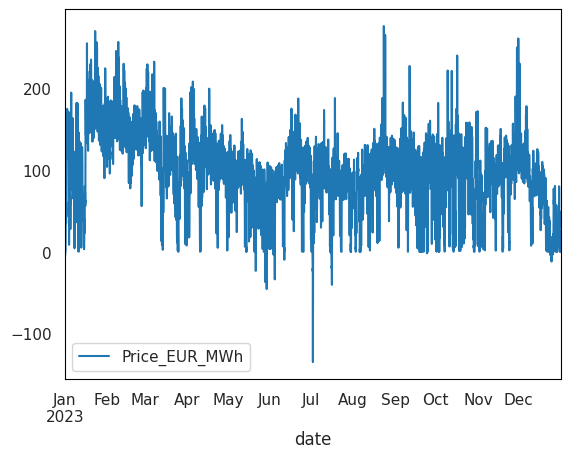

In [48]:
# prices 

df_hourly_prices.plot()

In [49]:
df_hourly_tempo1 = pd.read_csv(
    path.join(GDC_DATA_PATH, 'real', 'tempo_days_2022_2023.csv'),
    sep='\t'
)

df_hourly_tempo2 = pd.read_csv(
    path.join(GDC_DATA_PATH, 'real', 'tempo_days_2023_2024.csv'),
    sep='\t'
)

In [50]:
df_tempo_2023 = pd.concat((df_hourly_tempo1, df_hourly_tempo2), axis=0)
df_tempo_2023.set_index('Date', inplace=True)
df_tempo_2023.index = pd.to_datetime(df_tempo_2023.index)
df_tempo_2023 = df_tempo_2023.loc['2023']

In [51]:
red_days = df_tempo_2023['Color'] == 'ROUGE'
red_days

Date
2023-01-01    False
2023-01-02    False
2023-01-03    False
2023-01-04    False
2023-01-05    False
              ...  
2023-12-27    False
2023-12-28    False
2023-12-29    False
2023-12-30    False
2023-12-31    False
Name: Color, Length: 365, dtype: bool

In [52]:
def retrieve_base_variable_price(day):
    _, _ , breakdown = get_base_price(day, subscribed_power=6, kwh=1, include_breakdown=True)
    return breakdown['unit_variable_ht']

df_variable_price = df_hourly_prices.index.to_series().apply(retrieve_base_variable_price)
df_variable_price

date
2023-01-01 00:00:00    0.1374
2023-01-01 01:00:00    0.1374
2023-01-01 02:00:00    0.1374
2023-01-01 03:00:00    0.1374
2023-01-01 04:00:00    0.1374
                        ...  
2023-12-31 19:00:00    0.1887
2023-12-31 20:00:00    0.1887
2023-12-31 21:00:00    0.1887
2023-12-31 22:00:00    0.1887
2023-12-31 23:00:00    0.1887
Name: date, Length: 8760, dtype: float64

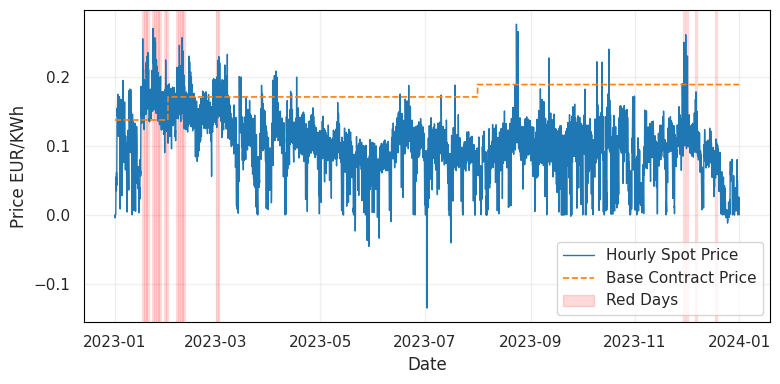

In [63]:
fig, ax = plt.subplots(figsize=(8,4))

line1, = ax.plot(df_hourly_prices.index, df_hourly_prices['Price_EUR_MWh'] / 1000, label='Hourly Spot Price', lw=1)


line2, = ax.plot(
    df_variable_price.index,
    df_variable_price,   # adjust column name as needed
    label="Base Contract Price",
    lw=1.2
)

for day in red_days.index[red_days]:   # or red_days == True
    start = pd.Timestamp(day)
    end   = start + pd.Timedelta(days=1)
    ax.axvspan(start, end, color='red', alpha=0.1)

# --- Create explicit legend entry for red-day shading ---
red_patch = mpatches.Patch(
    facecolor='red', alpha=0.15,
    edgecolor='red',
    label="Red Days"
)

# --- Construct legend explicitly ---
ax.legend(handles=[line1, line2, red_patch])

ax.set_ylabel("Price EUR/KWh")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)
save_fig('spot_base_tempo.pdf')